# Medical Cost Prediction with Keras

## Project Overview
Predict medical costs using linear regression with Keras.  
**Dataset**: Age, BMI, smoking status, and other health-related features.  
**Goal**: Build a neural network to estimate insurance charges.

In [1]:
# Install required libraries (uncomment if needed)
# !pip install pandas numpy matplotlib seaborn scikit-learn tensorflow

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping

print("Libraries imported!")

Libraries imported!


In [2]:
url = 'https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv'
df = pd.read_csv(url)

print('Data shape:', df.shape)
df.head()

Data shape: (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Data Preprocessing
- Convert categorical variables (sex, smoker, region) to numerical using one-hot encoding
- Split data into features (X) and target (y)
- Train-test split (80-20)
- Scale numerical features (age, BMI, children)

In [3]:
# Convert categorical variables
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Split features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
num_cols = ['age', 'bmi', 'children']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Exploratory Data Analysis (EDA)
Key insights from data visualization:

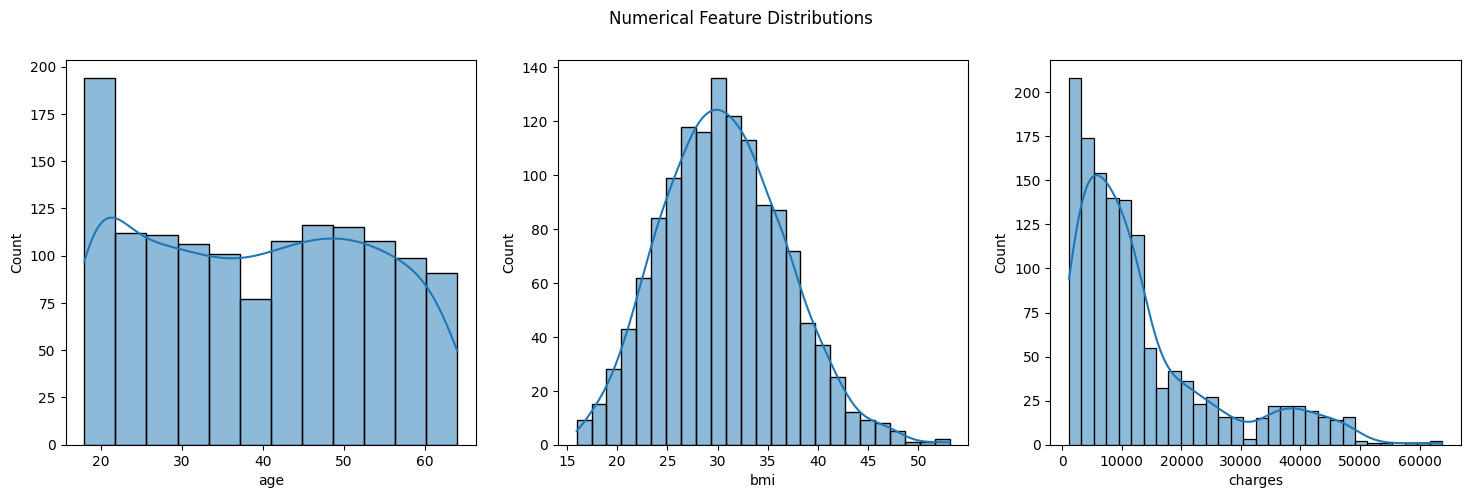

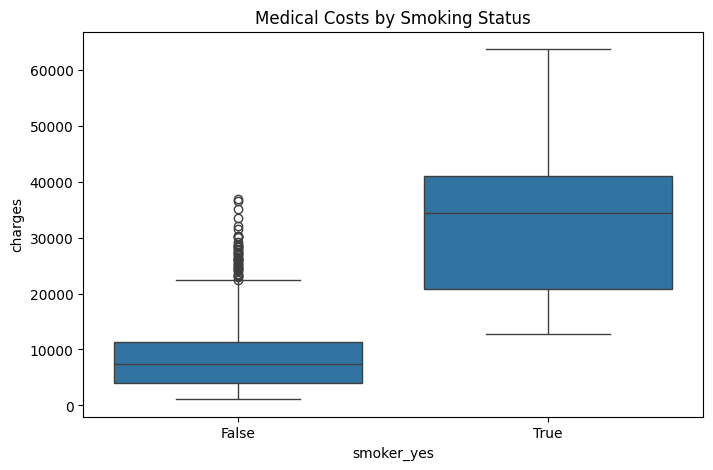

In [4]:
# Plot distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['age'], kde=True, ax=ax[0])
sns.histplot(df['bmi'], kde=True, ax=ax[1])
sns.histplot(df['charges'], kde=True, ax=ax[2])
plt.suptitle("Numerical Feature Distributions")
plt.show()

# Smoking vs charges
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker_yes', y='charges', data=df)
plt.title("Medical Costs by Smoking Status")
plt.show()

## Model Architecture
- 4 hidden layers with ReLU activation
- Adam optimizer with learning rate 0.001
- Early stopping to prevent overfitting

In [5]:
# Build model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

## Model Training
- 100 maximum epochs
- Batch size 32
- 20% validation split
- Early stopping (patience=10)

In [6]:
# Early stopping callback
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Train model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

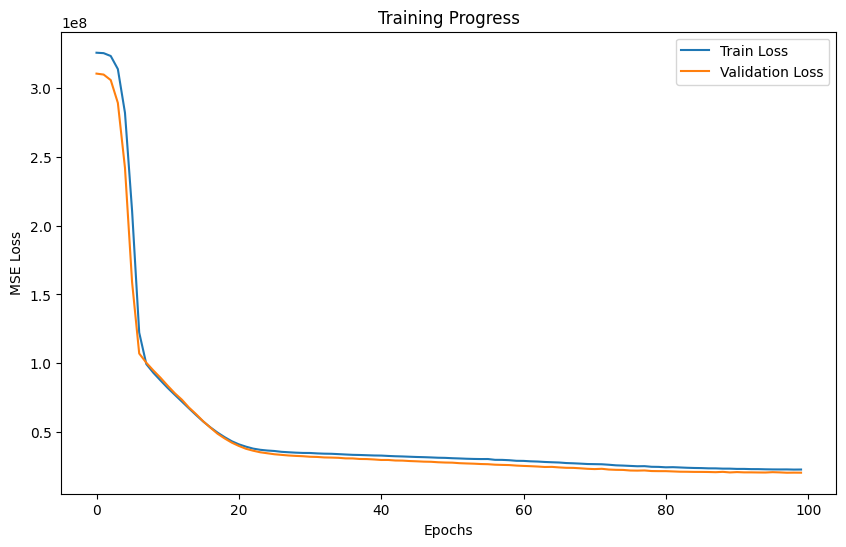

In [7]:
# Plot loss curves
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title("Training Progress")
plt.legend()
plt.show()

## Model Evaluation
Performance metrics on test set:

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Test MAE: $2687.50


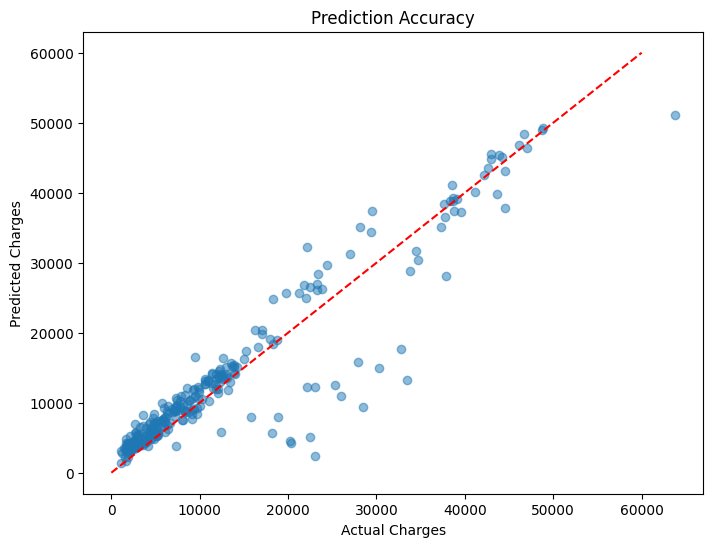

In [8]:
# Predict on test set
y_pred = model.predict(X_test).flatten()

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE: ${mae:.2f}")

# Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 60000], [0, 60000], 'r--')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Prediction Accuracy")
plt.show()

## Conclusion

**Key Findings:**

- Smoking status → Most significant predictor

- Age/BMI → Moderate positive impact

- Region/sex → Minimal influence

**Limitations:**

- Small dataset (~1.3k samples)

- Missing key features (e.g., pre-existing conditions)

- Regional bias in data

**Final Thoughts**

This project highlights the potential of machine learning in healthcare cost prediction, but it also underscores the importance of high-quality data and thoughtful model design. By addressing the limitations and exploring the future work outlined above, this model could be refined into a powerful tool for insurers, healthcare providers, and policymakers.